In [1]:
import pathlib
import numpy as np
import pandas as pd
# Disable warnings
import warnings
warnings.filterwarnings("ignore")

# Import plotting modules
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

sns.set_context(
    "notebook", 
    font_scale=1.5,       
    rc={ 
        "figure.figsize": (11, 8), 
        "axes.titlesize": 18 
    }
)

from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8

In [2]:
data_path = pathlib.Path("data")
data_path =data_path.joinpath('mlbootcamp5_train.csv')
data_path

WindowsPath('data/mlbootcamp5_train.csv')

In [3]:
dataset = pd.read_csv(data_path,sep =';')
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## 1.1. Basic observations

In [4]:
value_vars = ['gender','cholesterol','gluc', 'smoke', 'alco', 'active']
dataset_melt = pd.melt(dataset,value_vars=value_vars,id_vars =['cardio'])


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


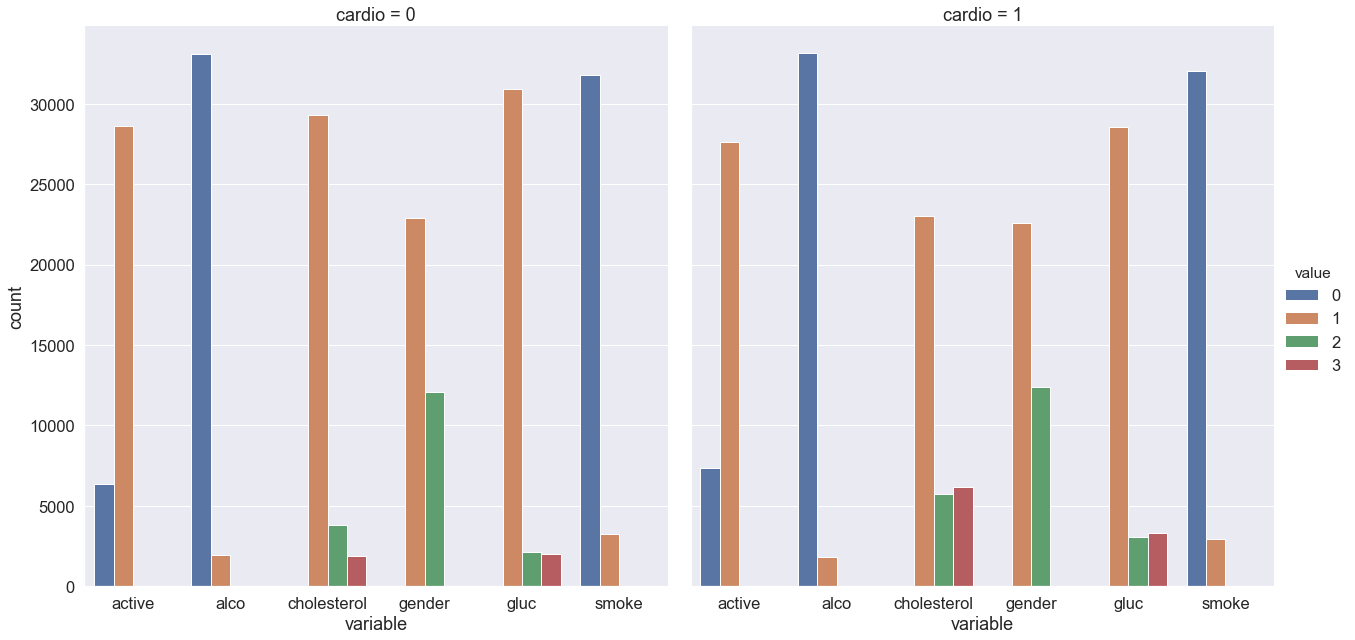

In [5]:
dataset_uniques = pd.DataFrame(dataset_melt.groupby(['variable','value','cardio'])['value'].count()).sort_index(level=[0, 1]).rename(columns={'value': 'count'}).reset_index()
sns.factorplot(x='variable', y='count', hue='value', col='cardio', data=dataset_uniques, kind='bar', size=9)

#####  How many men and women are present in this dataset? Values of the gender feature were not given (whether "1" stands for women or for men) – figure this out by looking analyzing height, making the assumption that men are taller on average.

Women - 45530
Men - 24470


In [6]:
dataset.groupby(['gender'])['height'].agg({'mean','count'})

,count,mean
gender,,
1,45530,161.355612
2,24470,169.947895


##### Which gender more often reports consuming alcohol - men or women? - Men

In [7]:
dataset.groupby(['gender'])['alco'].mean()

gender
1    0.025500
2    0.106375
Name: alco, dtype: float64

##### What is the difference between the percentages of smokers among men and women ? -20

In [8]:
dataset.groupby(['gender'])['smoke'].mean()*100

gender
1     1.785636
2    21.888026
Name: smoke, dtype: float64

##### What is the difference between median values of age for smokers and non-smokers (in months, rounded) -20

In [9]:
dataset.groupby(['smoke'])['age'].median()/30

smoke
0    657.4
1    637.5
Name: age, dtype: float64

## 1.2. Risk maps
Clarifications:

Calculate age_years feature – round age to the nearest number of years. For this task, select only the people of age 60 to 64, inclusive.
Cholesterol level categories differ between the figure and our dataset. The conversion for the cholesterol feature is as follows: 4 mmol/l  →  1, 5-7 mmol/l  →  2, 8 mmol/l  →  3.

##### Question 1.5. (2 points). Calculate the fraction of the people with CVD for the two segments described above. What is the ratio of these two fractions?

In [10]:
dataset['age_years'] = dataset['age']/365.25
dataset['age_years'] = np.round(dataset['age_years'])
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0


In [11]:
smoking_men_ds = dataset[(dataset['age_years']>=60) &
                         (dataset['age_years']<65) &
                         (dataset['gender']==2) &
                         (dataset['smoke']==1)                          
                        ]
smoking_men_lower =  smoking_men_ds[(smoking_men_ds['ap_hi']<120) &
                                    (smoking_men_ds['cholesterol']==1)]['cardio'].mean()


In [12]:
smoking_men_higher =  smoking_men_ds[(smoking_men_ds['ap_hi'] >=160) &
                                     (smoking_men_ds['ap_hi'] < 180) &
                                     (smoking_men_ds['cholesterol']==3)]['cardio'].mean()
display(smoking_men_lower)
display(smoking_men_higher)
display(smoking_men_higher/smoking_men_lower)

0.2631578947368421

0.8636363636363636

3.281818181818182

### 1.3. Analyzing BMI

In [13]:
dataset['BMI'] = (dataset['weight']/(dataset['height'] *dataset['height']) )*10000

In [14]:
dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.0,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52.0,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.0,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48.0,23.011177


### Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilogramms by the square of the height in meters. Normal BMI values are said to be from 18.5 to 25

#### Question 1.6. (2 points). Choose the correct statements:

#### Median BMI in the sample is within the range of normal BMI values.
#### The BMI for women is on average higher than for men. -True
#### Healthy people have, on average, a higher BMI than the people with CVD. -False
#### For healthy, non-drinking men, BMI is closer to the norm than for healthy, non-drinking women -True

In [15]:
dataset['BMI'].median()

26.37406812077498

In [16]:
dataset.groupby(['gender'])['BMI'].median()

gender
1    26.709402
2    25.910684
Name: BMI, dtype: float64

In [17]:
dataset.groupby(['cardio'])['BMI'].median()

cardio
0    25.476660
1    27.471384
Name: BMI, dtype: float64

In [18]:
dataset[(dataset['alco']==0)&(dataset['cardio']==0)].groupby(['gender'])['BMI'].median()

gender
1    25.654372
2    25.102391
Name: BMI, dtype: float64

In [19]:
filtered_dataset = dataset[ (dataset['ap_lo']>dataset['ap_hi'] ) &
                    (dataset['height'] >= dataset['height'].quantile(0.025)) &
                    (dataset['height'] <= dataset['height'].quantile(0.975)) &
                    (dataset['weight'] >= dataset['weight'].quantile(0.025)) &
                    (dataset['weight'] <= dataset['weight'].quantile(0.975))
                   ]
filtered_dataset.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1,60.0,24.341758
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1,50.0,36.888889
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1,64.0,20.338326
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1,51.0,34.154158
473,680,15226,1,150,95.0,150,1033,1,1,0,0,1,1,42.0,42.222222


#### 2.1. Correlation matrix visualization
###### To understand the features better, you can create a matrix of the correlation coefficients between the features. Use the initial dataset (non-filtered).

##### Task:
##### Plot a correlation matrix using heatmap(). You can create the matrix using the standard pandas tools with the default parameters.

In [20]:
non_numeric_cols =['id']

In [21]:
numeric_cols = [col for col in filtered_dataset.columns.values if col not in non_numeric_cols]

In [22]:
corr = filtered_dataset[numeric_cols].corr(method='pearson')

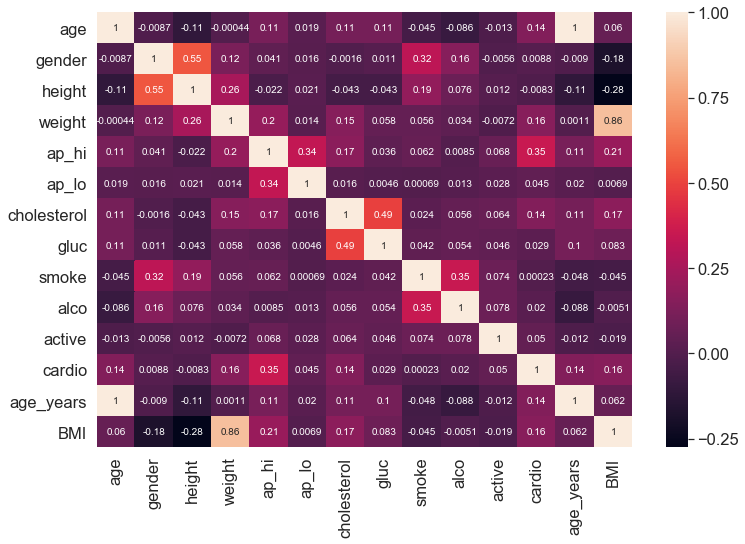

In [23]:
plt.figure(figsize=(12, 8))
ax = sns.heatmap(corr, annot=True)
plt.show()

#### Cardio, Cholesterol :0.22
#### Height, Smoke:0.19
#### Smoke, Alco:0.34
#### Height, Weight:0.29

##### 2.2. Height distribution of men and women
From our exploration of the unique values earlier, we know that the gender is encoded by the values 1 and 2. Although you do not know the mapping of these values to gender, you can figure that out graphically by looking at the mean values of height and weight for each value of the gender feature.

Task:
Create a violin plot for the height and gender using violinplot(). Use the parameters:

hue to split by gender;
scale to evaluate the number of records for each gender.
In order for the plot to render correctly, you need to convert your DataFrame to long format using the melt() function from pandas

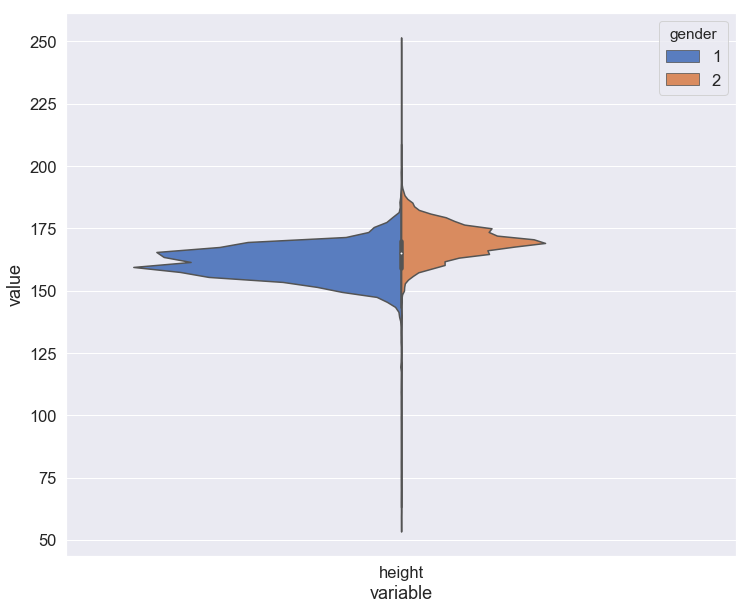

In [24]:
df = pd.melt(dataset, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(x="variable", y="value", hue="gender",data=df, palette="muted",scale='count',scale_hue=False, split=True, )

#### Question 2.2. (1 point). Which pair of features has the strongest Spearman correlation?

Height, Weight 

Age, Weight 

Cholesterol, Gluc 

Cardio, Cholesterol 

Ap_hi, Ap_lo 

Smoke, Alco 

In [25]:
spearman_corr = dataset[numeric_cols].corr(method='spearman')


In [26]:
display(spearman_corr['height']['weight'])
display(spearman_corr['age']['weight'])
display(spearman_corr['cholesterol']['gluc'])
display(spearman_corr['cardio']['cholesterol'])
display(spearman_corr['ap_hi']['ap_lo'])
display(spearman_corr['smoke']['alco'])

0.3135692698998496

0.06155893830937044

0.40780334258686346

0.21511719895015893

0.7354361051379777

0.34009376786968865

#### Question 2.3. (1 point). Why do these features have strong rank correlation?

Inaccuracies in the data (data acquisition errors).

Relation is wrong, these features should not be related.

Nature of the data.

##### Ans. Nature of the data.


#####  2.4. Age
Previously, we calculated the age of the respondents in years at the moment of examination.

Task:
Create a count plot using countplot() with the age on the X axis and the number of people on the Y axis. Your resulting plot should have two columns for each age, corresponding to the number of people for each cardio class of that age.

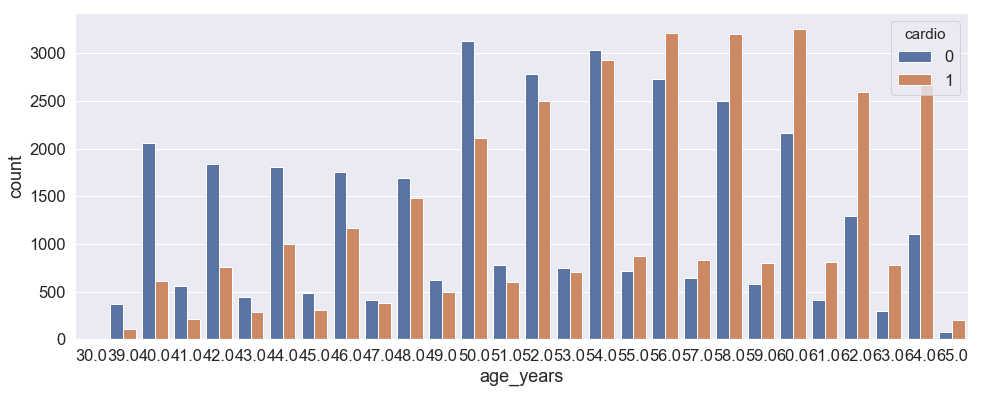

In [27]:
age_count = dataset.groupby(['age_years'])['id'].agg({'count':'count'}).reset_index()
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="age_years", hue='cardio' ,data=dataset)

plt.show()

Ans :55